# 图像特效-手绘风格

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
src = cv2.imread('../datas/p3.jpg')
gray = cv2.imread('../datas/p3.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [11]:
def handdraw_style(src,depth=10):
    srcf = src.astype(np.float32)
    if depth < 0:
        depth = 0
    if depth > 100:
        depth = 100
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    grad = np.gradient(srcf)
#     print(len(grad))
    # 取图像灰度的梯度值
    gradx,grady,_ = grad
    gradx = gradx * depth / 100.
    grady = grady * depth / 100.
    A = np.sqrt(gradx ** 2 + grady ** 2 + 1)
    normx = gradx / A
    normy = grady / A
    normz = 1.0 / A
    
    # 光源的俯视角度，弧度值
    vec_el = np.pi / 2.2
    # 光源的方位角度，弧度值
    vec_az = np.pi / 4.
    dx = np.cos(vec_el) * np.cos(vec_az)  # 光源对x 轴的影响
    dy = np.cos(vec_el) * np.sin(vec_az)  # 光源对y 轴的影响
    dz = np.sin(vec_el)  # 光源对z 轴的影响
    
    b = 255 * (dx * normx + dy * normy + dz * normz)  # 光源归一化
    b = b.clip(0, 255)
    dst = b.astype(np.uint8)
    return dst

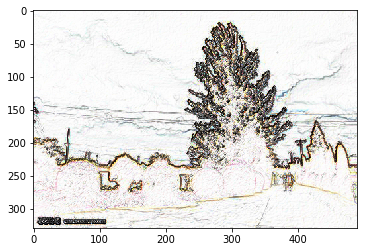

In [12]:
dst = handdraw_style(rgb)
plt.imshow(dst)